<a href="https://colab.research.google.com/github/purshottamkumarr/Supervised_Learning_Project/blob/main/Titanic_survial_Predication(15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
Titanic_data = pd.read_csv("titanic survival.csv")
Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
Titanic_data.shape

(418, 12)

In [ ]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# handling the missing data
Titanic_data = Titanic_data.drop(columns = "Cabin",axis = 1)

In [ ]:
Titanic_data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [ ]:
Titanic_data["Age"].fillna(Titanic_data["Age"].mean(),inplace = True)

In [ ]:
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
print(Titanic_data["Fare"].mode())

0    7.75
Name: Fare, dtype: float64


In [ ]:
print(Titanic_data["Fare"].mode()[0])

7.75


In [ ]:
Titanic_data["Fare"].fillna(Titanic_data["Fare"].mode()[0],inplace = True)

In [ ]:
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
Titanic_data["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

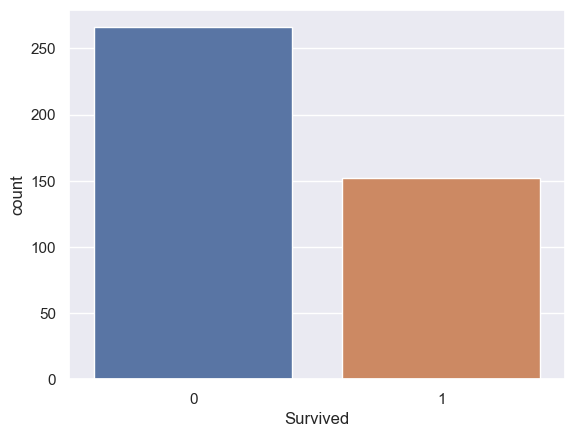

In [ ]:
sns.set()
sns.countplot(x = "Survived",data = Titanic_data );

In [ ]:
Titanic_data["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

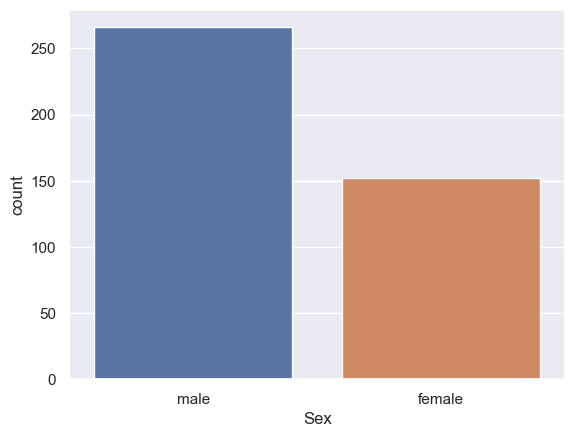

In [ ]:
sns.set()
sns.countplot(x = "Sex",data = Titanic_data);

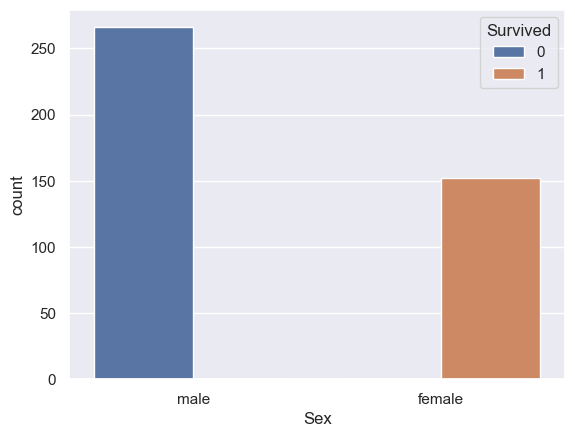

In [ ]:
sns.countplot(x = "Sex",hue = ""Survived"",data = Titanic_data);

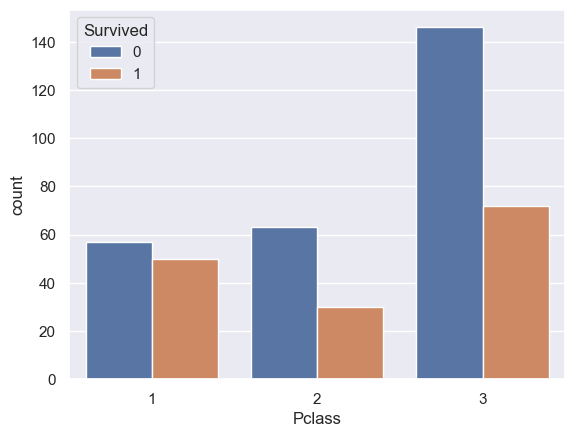

In [ ]:
sns.set()
sns.countplot(x = "Pclass",hue ="Survived",data = Titanic_data);

In [ ]:
Titanic_data["Pclass"].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

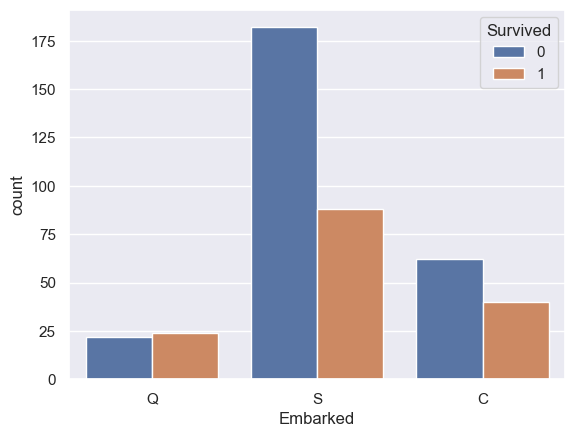

In [ ]:
sns.set()
sns.countplot(x = "Embarked",hue = "Survived",data =Titanic_data);

In [ ]:
Titanic_data["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [ ]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
Titanic_data.replace({"Sex":{"male":0,"female":0}},inplace = True)
Titanic_data.replace({"Embarked":{"Q":0,"S":1,"C":2}},inplace = True)

In [ ]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,1


In [ ]:
x = Titanic_data.drop(columns = ["PassengerId","Survived","Ticket","Name"],axis = 1)
y = Titanic_data["Survived"]

In [ ]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         0
1         3    0  47.00000      1      0    7.0000         1
2         2    0  62.00000      0      0    9.6875         0
3         3    0  27.00000      0      0    8.6625         1
4         3    0  22.00000      1      1   12.2875         1
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         1
414       1    0  39.00000      0      0  108.9000         2
415       3    0  38.50000      0      0    7.2500         1
416       3    0  30.27259      0      0    8.0500         1
417       3    0  30.27259      1      1   22.3583         2

[418 rows x 7 columns]


In [ ]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(418, 7) (334, 7) (84, 7)


In [ ]:
model = LogisticRegression()

In [ ]:
# Training The Logistic Regression

model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
x_train_prediction = model.predict(x_train)
print(x_train_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0]


In [ ]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print("Accuracy on the training data:",training_data_accuracy)

Accuracy on the training data: 0.6467065868263473


In [ ]:
x_test_predication = model.predict(x_test)

In [ ]:
accuracy_score_test = accuracy_score(y_test,x_test_predication)
print("Accuarcy on the Test Data:",accuracy_score_test)

Accuarcy on the Test Data: 0.6309523809523809


In [ ]:
input_data = (1,3,0,47.00000,1,0,7.0000)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

predication = model.predict(input_data_reshape)

print(predication)

[0]


C:\Users\puru\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
if(predication[0]==0):
    print("The Person Has Survived")
else:
    print("The Person Has not Survived")

The Person Has Survived
